In [1]:
import numpy as np
import dataframe as df
from keras import *
from keras.layers import *
from keras.regularizers import *
from keras.datasets import *
from keras.models import *
from keras.optimizers import *
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [67]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [68]:
x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

In [33]:
MSE performs much better than MAE in autoencoders. They also can achieve very low loss. 
Instad of softmax use sigmoid for better visualization of the decoded image.

SyntaxError: invalid syntax (<ipython-input-33-e5dc56210d5a>, line 1)

In [70]:
history = autoencoder.fit(x_train,x_train, batch_size = 128, epochs = 10 , verbose = 1 , validation_split=0.1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0461 - val_loss: 0.0241
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0190 - val_loss: 0.0146
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0121 - val_loss: 0.0100
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0086 - val_loss: 0.0075
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0057 - val_loss: 0.0054
Epoch 7/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 

In [71]:
decoded_imgs = autoencoder.predict(x_test)

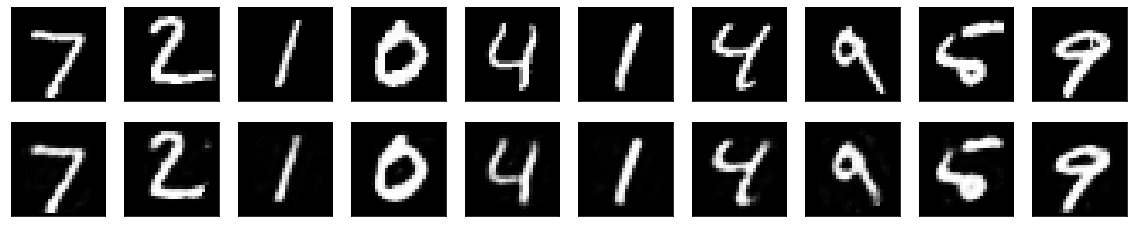

In [72]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Multilayer Autoencoders

In [74]:
input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 784

#encoders
x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation = 'relu')(x)
hidden_2 = Dense(hidden_size_2, activation = 'relu')(hidden_1)

#decoders
hidden_3 = Dense(hidden_size_1, activation = 'relu')(hidden_2)
output = Dense(output_size, activation = 'sigmoid')(hidden_3)

multi_ae = Model(input = x, output = output)
multi_ae.compile(optimizer = 'adam', loss = 'mse')


/home/aminul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [81]:
earlystopper = EarlyStopping(patience=3, verbose=1)
history = multi_ae.fit(x_train,x_train, epochs = 10, batch_size = 128, 
                       verbose = 1, validation_split=0.1, callbacks =[earlystopper] )

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.0040 - val_loss: 0.0041
Epoch 2/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.0040 - val_loss: 0.0042
Epoch 3/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.0040 - val_loss: 0.0042
Epoch 4/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.0040 - val_loss: 0.0041
Epoch 00004: early stopping


In [82]:
decoded_imgs = multi_ae.predict(x_test)

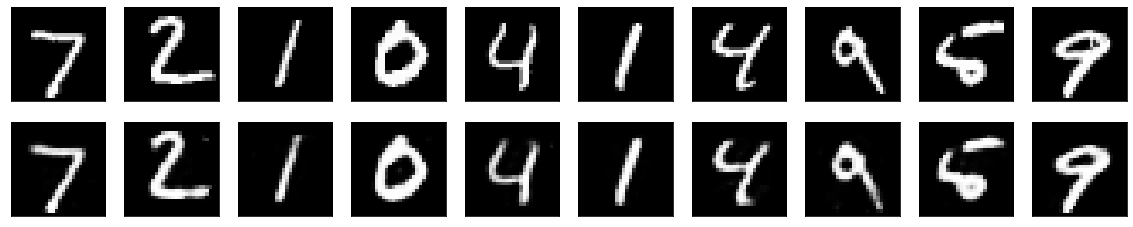

In [83]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['val_loss', 'loss'])


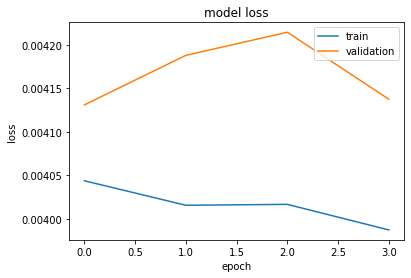

In [84]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Convolutional AE. 

It doesn't take flatten values like the previous ones but instead takes images. 
So, we are going to feed images to it

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
x = Input(shape=(28,28,1))

#encoder
conv_1 = Conv2D(filters = 16, kernel_size = (3,3), 
               activation = 'relu', padding = 'same')(x)
pool_1 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_1)
conv_2 = Conv2D(filters = 8, kernel_size = (3,3), 
               activation = 'relu',  padding = 'same')(pool_1)
pool_2 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_2)
conv_3 = Conv2D(filters = 8, kernel_size = (3,3),
               activation = 'relu', padding ='same')(pool_2)
pool_3 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_3)

#decoder
conv_4 = Conv2D(filters = 8 , kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(pool_3)
upsample_1 = UpSampling2D((2,2))(conv_4)
conv_5 = Conv2D(filters = 8, kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(upsample_1)
upsample_2 = UpSampling2D((2,2))(conv_5)
conv_6 = Conv2D(filters = 16, kernel_size =(3,3),
               activation = 'relu', padding='same')(pool_1)
upsample_3 = UpSampling2D((2,2))(conv_6)

conv_7 = Conv2D(filters = 1, kernel_size = (3,3), 
               activation = 'sigmoid', padding = 'same')(upsample_3)

conv_ae = Model(input = x, output = conv_7)
conv_ae.compile(optimizer = 'adadelta', loss='binary_crossentropy')


/home/aminul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [9]:
earlystopper = EarlyStopping(patience=3, verbose=1)
history = conv_ae.fit(x_train,x_train, epochs = 3, batch_size = 128, 
                      validation_data = (x_test,x_test), callbacks = [earlystopper])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 45s 746us/step - loss: 0.1018 - val_loss: 0.0698
Epoch 2/3
60000/60000 [==============================] - 56s 931us/step - loss: 0.0685 - val_loss: 0.0665
Epoch 3/3
60000/60000 [==============================] - 55s 915us/step - loss: 0.0670 - val_loss: 0.0666


In [10]:
decoded_imgs_conv = conv_ae.predict(x_test)

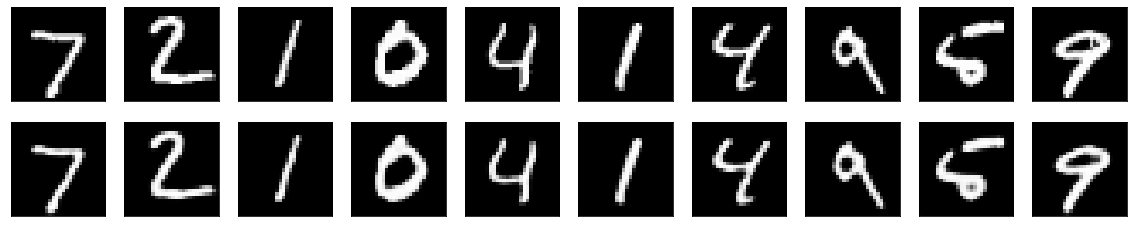

In [11]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['val_loss', 'loss'])


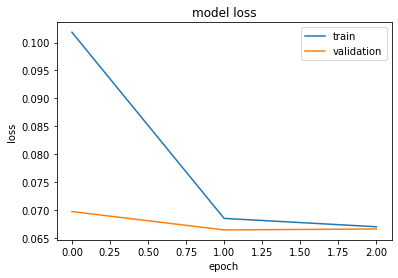

In [12]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Denoising Autoencoders

DAE can be used for the removal of noises in the images

In [13]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)


In [15]:
#creating noisy data 
np_factor = 0.5
x_train_noise = x_train + np_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noise = x_test + np_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noise = np.clip(x_train_noise,0.,1.)
x_test_noise = np.clip(x_test_noise,0.,1.)

In [18]:
x = Input(shape=(28, 28,1)) 


#encoder
conv_1 = Conv2D(filters = 16, kernel_size = (3,3), 
               activation = 'relu', padding = 'same')(x)
pool_1 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_1)
conv_2 = Conv2D(filters = 8, kernel_size = (3,3), 
               activation = 'relu',  padding = 'same')(pool_1)
pool_2 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_2)
conv_3 = Conv2D(filters = 8, kernel_size = (3,3),
               activation = 'relu', padding ='same')(pool_2)
pool_3 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_3)

#decoder
conv_4 = Conv2D(filters = 8 , kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(pool_3)
upsample_1 = UpSampling2D((2,2))(conv_4)
conv_5 = Conv2D(filters = 8, kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(upsample_1)
upsample_2 = UpSampling2D((2,2))(conv_5)
conv_6 = Conv2D(filters = 16, kernel_size =(3,3),
               activation = 'relu', padding='same')(pool_1)
upsample_3 = UpSampling2D((2,2))(conv_6)

conv_7 = Conv2D(filters = 1, kernel_size = (3,3), 
               activation = 'sigmoid', padding = 'same')(upsample_3)

conv_ae = Model(input = x, output = conv_7)
conv_ae.compile(optimizer = 'adadelta', loss='binary_crossentropy')

In [19]:
epochs = 3
batch_size = 128

history = dae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1286 - val_loss: 0.0889
Epoch 2/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0857 - val_loss: 0.0799
Epoch 3/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0797 - val_loss: 0.0789


In [21]:
decoded_imgs = dae.predict(X_test)

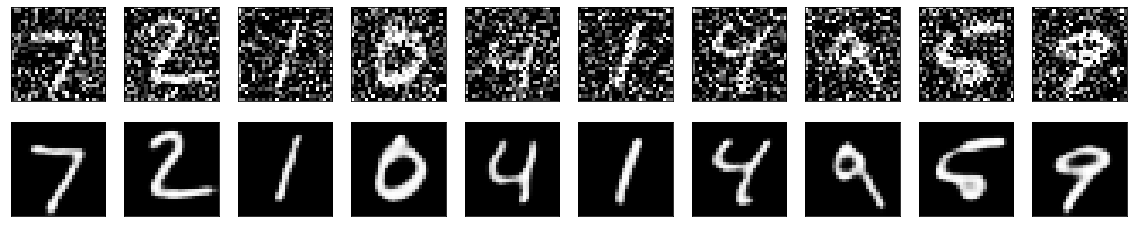

In [22]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [10]:
x = Input(shape=(32, 32, 3)) 

conv_1 = Conv2D(filters = 16, kernel_size = (3,3), 
               activation = 'relu', padding = 'same')(x)
pool_1 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_1)
conv_2 = Conv2D(filters = 8, kernel_size = (3,3), 
               activation = 'relu',  padding = 'same')(pool_1)
pool_2 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_2)
conv_3 = Conv2D(filters = 8, kernel_size = (3,3),
               activation = 'relu', padding ='same')(pool_2)
pool_3 = MaxPool2D(pool_size = (2,2), padding = 'same')(conv_3)

#decoder
conv_4 = Conv2D(filters = 8 , kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(pool_3)
upsample_1 = UpSampling2D((2,2))(conv_4)
conv_5 = Conv2D(filters = 8, kernel_size =(3,3), 
               activation = 'relu', padding = 'same')(upsample_1)
upsample_2 = UpSampling2D((2,2))(conv_5)
conv_6 = Conv2D(filters = 16, kernel_size =(3,3),
               activation = 'relu', padding='same')(pool_1)
upsample_3 = UpSampling2D((2,2))(conv_6)

conv_7 = Conv2D(filters = 3, kernel_size = (3,3), 
               activation = 'sigmoid', padding = 'same')(upsample_3)

conv_ae = Model(input = x, output = conv_7)
conv_ae.compile(optimizer = 'adadelta', loss='binary_crossentropy')


/home/aminul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [11]:
epochs = 10
batch_size = 128

history = dae.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 2/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 8/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 9/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch

In [55]:
decoded_imgs = dae.predict(x_test)

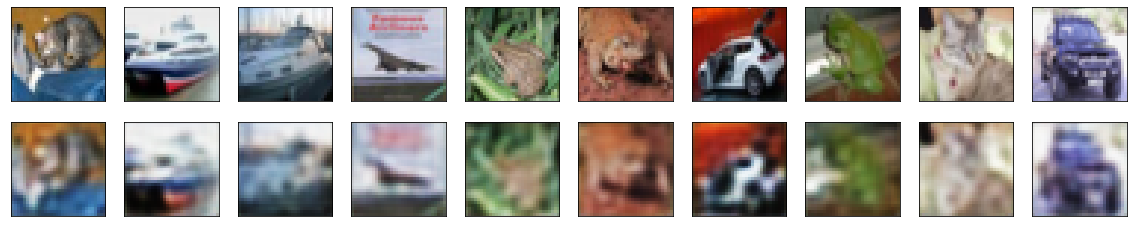

In [56]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()